## **Bank churn prediction** 

Aims: Build a prediction model that will perform the following: Classify if a customer is going to churn or not
Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

More explaining 


DEPLOY MODEL IN POWER BI...... 

In [19]:
# Importing project dependencies 

# General 
import pandas as pd
import numpy as np

# Data warehousing 
from sqlalchemy import create_engine
import pyodbc
import urllib

# Exploratory Data Analysis & Visualisation 
%matplotlib inline
import pandas_profiling
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Feature Engineering and Modelling 
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model imporvement and Evaluation 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
import itertools
from matplotlib import rc,rcParams
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score

# Supressing warning messages 
from warnings import filterwarnings
filterwarnings("ignore")  

#### **----------------------------------  1. Data collection  -----------------------------------**

In [2]:
# Importing data through API 
# !kaggle datasets download -d kmalit/bank-customer-churn-prediction -p ..\Data --unzip 

In [3]:
# Reading data into dataframe 
data = pd.read_csv('../Data/Churn_Modelling.csv')

#### **----------------------------------  2. Data pre-processing  -----------------------------------**

In [4]:
# Viewing first 5 rows of data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Viewing the data types of the columns
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# Viewing dataset shape
data.shape

(10000, 14)

In [7]:
# 1st check for null values and datatype check 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# 2nd check for number of null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Unique count for each variable
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# Viewing summary of statistics for numeric columns
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# (SQL standard) Formatting column headers by removing potential capital letters and spaces in column headers 
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ','_')

#### **----------------------------------  3. Data Warehousing  -----------------------------------**

In [83]:
# Saving cleaned data as csv
data.to_csv('../Data/bankchurn_clean.csv', index=False)

In [84]:
def ETL_SQLServer(Server,db,tablename):
  """
    :param Server: Destination Server
    :param db: Destination Database name MUST ALREADY EXIST
    :param tablename: Project ID and Dataset name
    """

  # SQL table header format
  tablename = tablename.lower()
  tablename = tablename.replace(' ','_')

  quoted = urllib.parse.quote_plus("DRIVER={SQL Server};SERVER=%s;DATABASE=%s"%(Server,db))
  engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

  data.to_sql('{tb}'.format(tb=tablename), schema='dbo', con = engine, index=False, if_exists='replace')

  return("ETL successful, {num} rows loaded into table: {tb}.".format(num=len(data.iloc[:,0]), tb=tablename))

In [85]:
# # Function to warehouse dataframe
ETL_SQLServer("[SERVER NAME]","Projects","P2 bank churn")

'ETL successful, 10000 rows loaded into table: p2_bank_churn.'

#### **----------------------------------  4. Exploratory data analysis  -----------------------------------**

In [12]:
# Checking distribution of categorical fields 
print(data.geography.value_counts())
print(data.gender.value_counts())
print(data.exited.value_counts())

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64
Male      5457
Female    4543
Name: gender, dtype: int64
0    7963
1    2037
Name: exited, dtype: int64


In [13]:
# Viewing summary of statistics for numeric columns
data.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
# Setting my custom color palette
colors = ["#32CD32","#FF0000"]
sns.set_palette(sns.color_palette(colors))

In [15]:
totretained = data[data['exited'] == 0]['exited'].count() / data.shape[0] * 100
totlost = data[data['exited'] == 1]['exited'].count() / data.shape[0] * 100

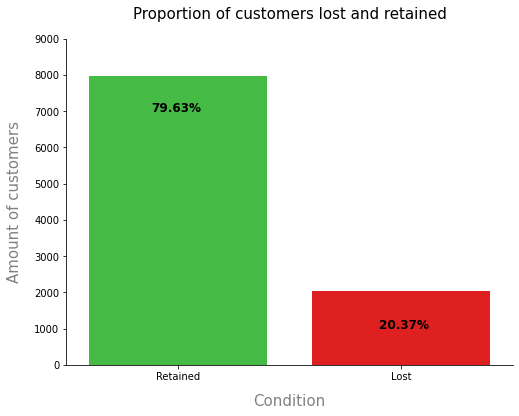

In [21]:
# Showing distribtuon of target values 
fig, ax = plt.subplots()
plt.figure(figsize=(8,6),facecolor='white')
sns.countplot(x='exited', data=data)
plt.xticks([0, 1], ['Retained', 'Lost'])
plt.xlabel('Condition', size=15, labelpad=12, color='grey')
plt.ylabel('Amount of customers', size=15, labelpad=12, color='grey')
plt.title("Proportion of customers lost and retained", size=15, pad=20)
plt.ylim(0, 9000)
plt.text(-0.12, 7000, f"{round(totretained, 2)}%", fontsize=12,weight='bold')
plt.text(0.90, 1000, f"{round(totlost, 2)}%", fontsize=12,weight='bold')
sns.despine()
plt.savefig('../images/Churn_barchart_distrib.png')
plt.close(1)
plt.show()

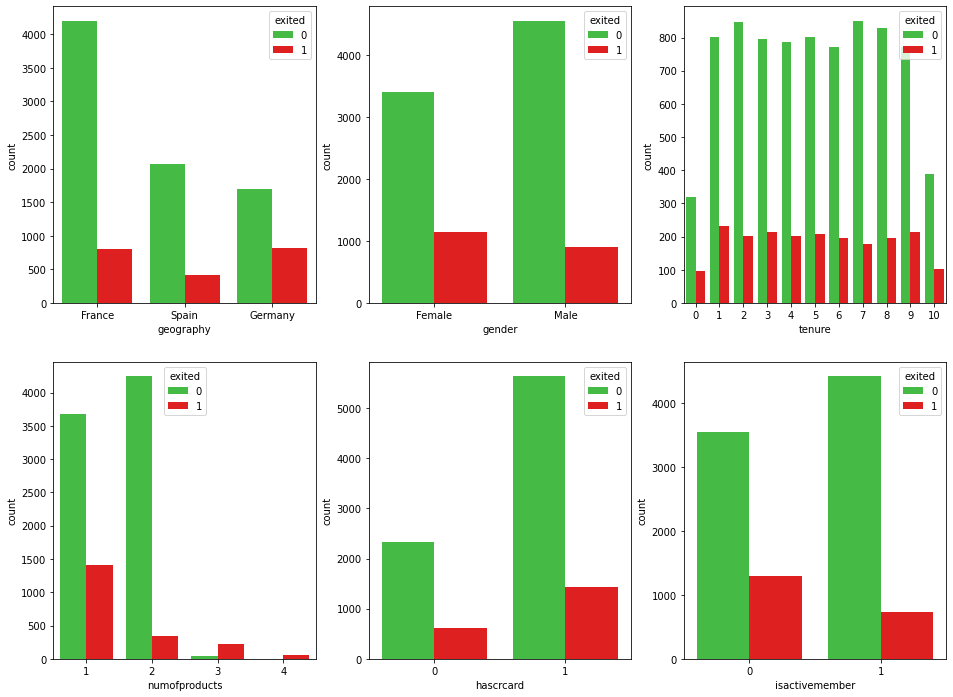

In [22]:
#Putting all the above results in a single visualization

cat_data=['geography', 'gender', 'tenure','numofproducts', 'hascrcard','isactivemember']
q=1
plt.figure(figsize=(16,12),facecolor='white')
# Plot a grid with count plots of all categorical variables
for i in cat_data:
    plt.subplot(2,3,q)
    ax=sns.countplot(data[i],hue=data.exited)
    plt.xlabel(i)
    q+=1

plt.savefig('../images/independentfeatures_distrib.png')
plt.show()

<Figure size 792x576 with 0 Axes>

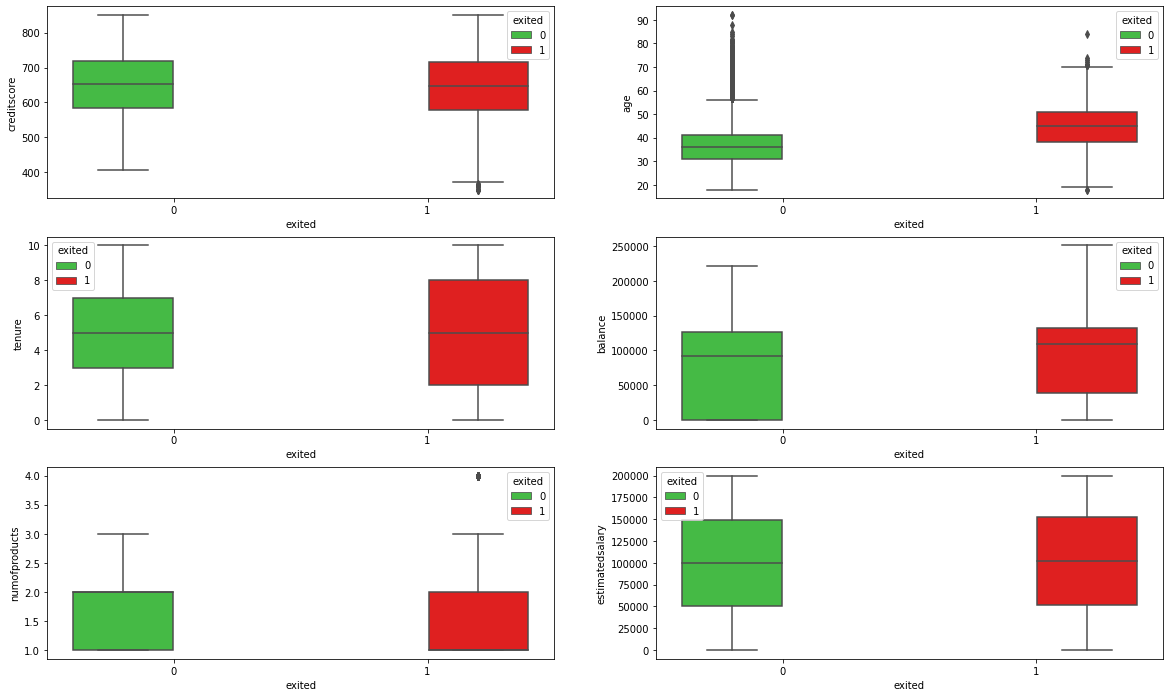

In [23]:
 # Relations based on the continuous data attributes
plt.figure(figsize=(11,8),facecolor='white')
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='creditscore',x = 'exited', hue = 'exited',data = data, ax=axarr[0][0])
sns.boxplot(y='age',x = 'exited', hue = 'exited',data = data , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'exited', hue = 'exited',data = data, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'exited', hue = 'exited',data = data, ax=axarr[1][1])
sns.boxplot(y='numofproducts',x = 'exited', hue = 'exited',data = data, ax=axarr[2][0])
sns.boxplot(y='estimatedsalary',x = 'exited', hue = 'exited',data = data, ax=axarr[2][1])
plt.savefig('../images/boxplots.png')

In [32]:
data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
# correlation of each variab
# data.corr()

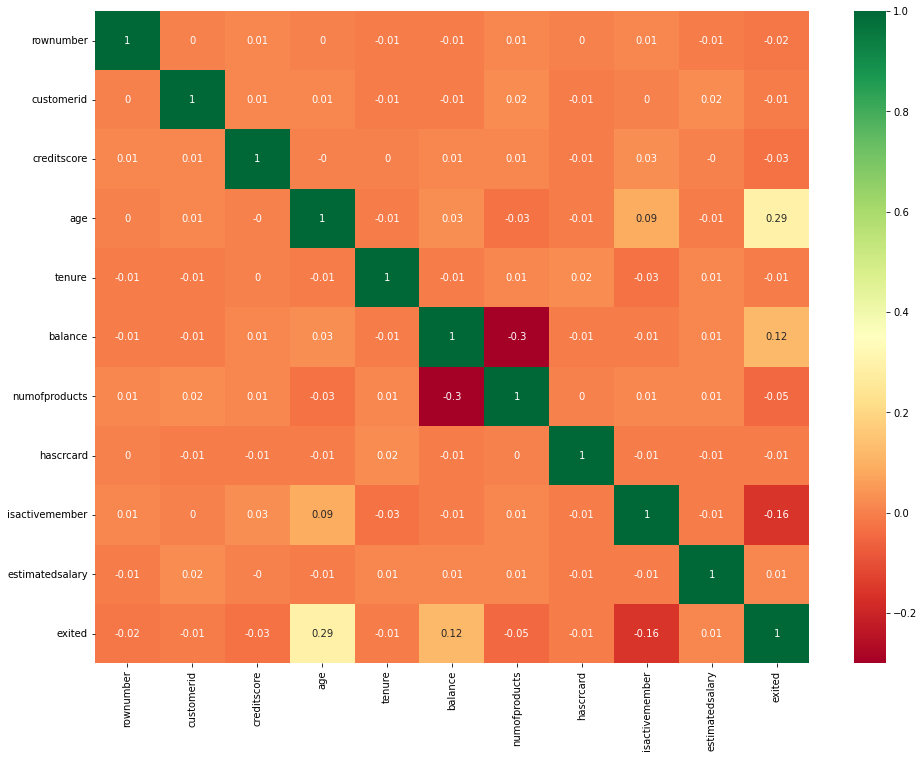

In [94]:
# Viewing correlations of each features in dataset 
datacorr = round(data.corr(),2)
corrmat = datacorr
top_corr_features = corrmat.index
plt.figure(figsize=(16,12),facecolor='white')

# Plotting heat map
plot = sns.heatmap(datacorr,annot=True,cmap="RdYlGn")
plt.savefig('../images/churn_correlation.png')

In [95]:
# profile report of each variable
# pandas_profiling.ProfileReport(data)

#### **----------------------------------  5. Feature engineering  -----------------------------------**

In [33]:
# Dropping fields that wont benefit the model
data.drop(labels=['rownumber','customerid','surname'], axis=1, inplace=True)

In [34]:
# One Hot encoding
data = pd.get_dummies(data, drop_first = False)
data.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [36]:
# Splitting dependent and independent features
cat_data = data[["geography_Germany", "geography_France","geography_Spain", "gender_Male","gender_Female" ,"hascrcard","isactivemember"]]
X = data.drop(["exited","geography_Germany", "geography_France","geography_Spain", "gender_Male","gender_Female" ,"hascrcard","isactivemember"],axis=1)

# Dependent feature | Target variable 
y= data['exited']


In [37]:
X

,creditscore,age,tenure,balance,numofproducts,estimatedsalary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,0.00,2,93826.63
4,850,43,2,125510.82,1,79084.10
...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64
9996,516,35,10,57369.61,1,101699.77
9997,709,36,7,0.00,1,42085.58
9998,772,42,3,75075.31,2,92888.52


In [39]:
cols = X.columns
index = X.index

In [40]:
# Robust scaler to sort out outliers 
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)
X = pd.concat([X,cat_data], axis = 1)
X.head()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary,geography_Germany,geography_France,geography_Spain,gender_Male,gender_Female,hascrcard,isactivemember
0,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,0,1,0,0,1,1,1
1,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,0,0,1,0,1,0,1
2,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,0,1,0,0,1,1,0
3,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,0,1,0,0,1,0,0
4,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,0,0,1,0,1,1,1


In [ ]:
print(X.shape, y.shape)

(10000, 14) (10000,)


In [ ]:
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.20, random_state=23, shuffle=True, stratify=y)

#### **----------------------------------  6. Modelling  -----------------------------------**

We are ready to build different models looking for the best fit. Predicting customer churn is a binary classification problem: Customers are either lost or retained in a given period of time.

For this aim, I'll test:

* Logistic regression classifier
* Support Vector Machine with Radial basis function kernel
* Random Forest

In [ ]:
models = []
models.append(('LR', LogisticRegression(random_state = 10101)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 10101)))
models.append(('RF', RandomForestClassifier(random_state = 10101)))
models.append(('SVM', SVC(gamma='auto', random_state = 10101)))

# evaluate each model in turn
results = []
names = []

In [ ]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.818000)
KNN: (0.835500)
CART: (0.803000)
RF: (0.868000)
SVM: (0.862500)


C:\Users\matti\anaconda3\envs\P2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


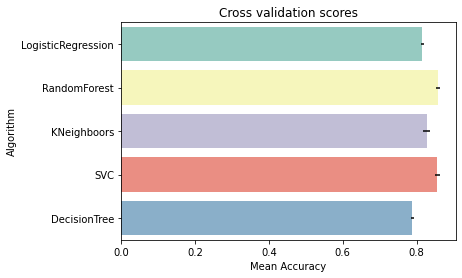

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=5)
# Modeling step Test differents algorithms 
random_state = 10101
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","RandomForest","KNeighboors","SVC","DecisionTree"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
cv_res[['CrossValMeans','Algorithm']]

,CrossValMeans,Algorithm
0,0.815000,LogisticRegression
1,0.857125,RandomForest
2,0.826500,KNeighboors
3,0.855625,SVC
4,0.788500,DecisionTree


In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

In [ ]:
rf = RandomForestClassifier(random_state = random_state)
param_grid = {'n_estimators': [50],
              'criterion': ['entropy', 'gini'],
              'bootstrap': [True],
              'max_depth': [6],
              'max_features': ['auto','sqrt'],
              'min_samples_leaf': [2, 3, 5],
              'min_samples_split': [2, 3, 5]}
                                  
scoring_metric='recall'
clf_rf = GridSearchCV(rf, param_grid = param_grid, scoring = scoring_metric, cv = 5, verbose = False, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train, y_train)

In [ ]:
print(best_clf_rf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10101),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['entropy', 'gini'],
                         'max_depth': [6], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 5], 'n_estimators': [50]},
             scoring='recall', verbose=False)


In [ ]:
y_pred = best_clf_rf.predict(X_test)


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1593
           1       0.88      0.37      0.52       407

    accuracy                           0.86      2000
   macro avg       0.87      0.68      0.72      2000
weighted avg       0.86      0.86      0.84      2000


Confusion Matrix:
[[1573   20]
 [ 257  150]]


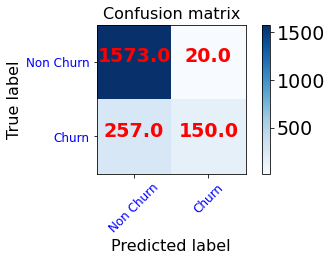

In [ ]:
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes=['Non Churn','Churn'],title='Confusion matrix')

In [ ]:
rf1=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10101, verbose=0,
            warm_start=False)
feature_imp = pd.Series(rf1.fit(X_train, y_train).feature_importances_,
                        index=X.columns).sort_values(ascending=False)

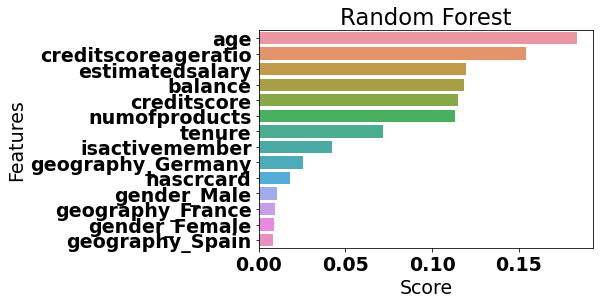

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score')
plt.ylabel('Features')
plt.title("Random Forest")
plt.show()

In [ ]:
# SVC
SVM = SVC()


param_grid = {
                'C': [0.1, 1, 10], 
                'gamma': [0.01, 0.1, 1],
                'kernel': ['rbf']
}

gs_SVM = GridSearchCV(SVM, param_grid, cv=kfold, n_jobs=4)

gs_SVM.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf']})

In [ ]:
y_pred = gs_SVM.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000


Confusion Matrix:
[[1545   48]
 [ 232  175]]


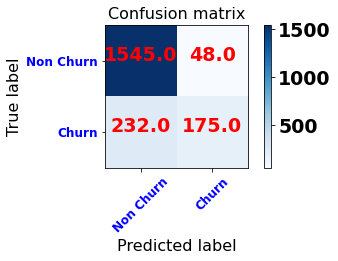

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes=['Non Churn','Churn'],title='Confusion matrix')